In [1]:
import numpy as np
import scipy.stats as st
import scipy.misc
import sklearn as sk
import sklearn.decomposition
import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.datasets import mnist

%matplotlib inline

ModuleNotFoundError: No module named 'keras'

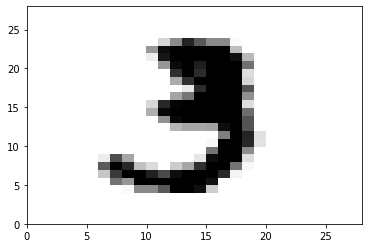

In [ ]:
#images = mnist.train_images()
images = mnist.load_data()[0][0]

plt.pcolor(np.flip(images[10, :, :], 0)*256, cmap='binary')

In [3]:
n, s1, s2 = np.shape(images)
p = s1*s2

y = mnist.load_data()[0][1]
#mnist.train_labels()
X = np.zeros((n, p))
for i in range(0, n):
    v = images[i, :, :]
    X[i,:] = v.flatten()

In [4]:
i0 = np.argwhere(y==0)
i1 = np.argwhere(y==1)
X0 = X[i0.flatten(), :]
X1 = X[i1.flatten(), :]

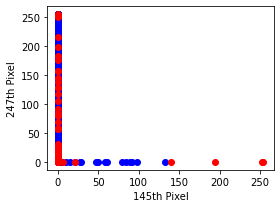

In [5]:
plt.figure(figsize=(4, 3))

plt.scatter(X0[:, 145], X0[:, 247], c='b')
plt.scatter(X1[:, 145], X1[:, 247], c='r')

plt.xlabel('145th Pixel')
plt.ylabel('247th Pixel')
plt.tight_layout()

# plt.savefig('../figures/mnist_145.pdf', format='pdf')

In [6]:
np.random.seed(2)

P = np.random.normal(size=(p, 2))

In [7]:
xx0=X0@P
xx1=X1@P

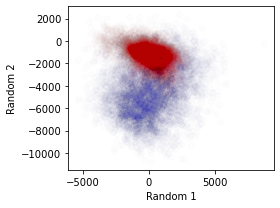

In [8]:
plt.figure(figsize=(4, 3))

plt.scatter(xx0[:, 0], xx0[:, 1], color=[0, 0, 0.7], marker='o', alpha=0.007)
plt.scatter(xx1[:, 0], xx1[:, 1], color=[0.7, 0, 0], marker='o', alpha=0.007)

plt.xlabel('Random 1')
plt.ylabel('Random 2')
plt.tight_layout()

# plt.savefig('../figures/mnist_random.pdf', format='pdf')

In [9]:
pca = sk.decomposition.PCA(n_components=2)

pca.fit(X)

PCA(n_components=2)

In [10]:
Y0 = X0@np.transpose(pca.components_)
Y1 = X1@np.transpose(pca.components_)

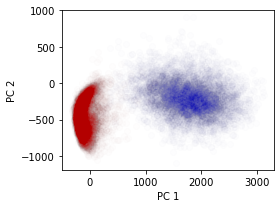

In [11]:
plt.figure(figsize=(4, 3))

plt.scatter(Y0[:, 0], Y0[:, 1], color=[0, 0, 0.7], marker='o',alpha=0.007)
plt.scatter(Y1[:, 0], Y1[:, 1], color=[0.7, 0, 0], marker='o',alpha=0.007)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()

# plt.savefig('../figures/mnist_pca.pdf', format='pdf')

In [12]:
vv = pca.components_

impc1 = np.flip(np.reshape(vv[0, :], (s1, s2)), 0)
impc2 = np.flip(np.reshape(vv[1, :], (s1, s2)), 0)

(0.0, 28.0, 0.0, 28.0)

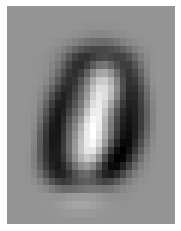

In [13]:
plt.figure(figsize=(3, 4))

plt.pcolor(impc1*256, cmap='binary')
plt.axis('off')

# plt.savefig('../figures/mnist_pc1.pdf', format='pdf')

(0.0, 28.0, 0.0, 28.0)

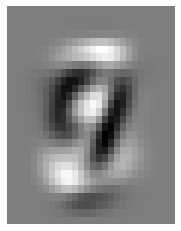

In [14]:
plt.figure(figsize=(3, 4))

plt.pcolor(impc2*256, cmap='binary')
plt.axis('off')

# plt.savefig('../figures/mnist_pc2.pdf', format='pdf')

In [15]:
pp = P.T

imr1 = np.flip(np.reshape(pp[0, :], (s1, s2)), 0)
imr2 = np.flip(np.reshape(pp[1, :], (s1, s2)), 0)

(0.0, 28.0, 0.0, 28.0)

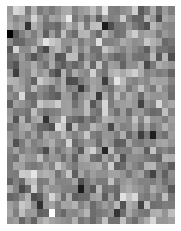

In [16]:
plt.figure(figsize=(3, 4))
plt.pcolor(imr1*256, cmap='binary')
plt.axis('off')

# plt.savefig('../figures/mnist_r1.pdf', format='pdf')

(0.0, 28.0, 0.0, 28.0)

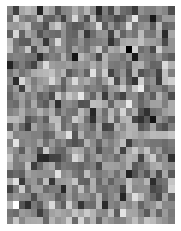

In [17]:
plt.figure(figsize=(3, 4))

plt.pcolor(imr2*256, cmap='binary')
plt.axis('off')

# plt.savefig('../figures/mnist_r2.pdf', format='pdf')